In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import mlab

from scipy import signal
import h5py, time


In [2]:
%matplotlib notebook

In [3]:
import sys
sys.path.append('/home/analysis_user/New_trap_code/Tools/')
import BeadDataFile

In [4]:
##Force Calibration with single freq, with xyz2

In [5]:
Year = "2020"
Month = "11"
Day = "10"
BeadNumber =1
folder = r"/data/new_trap/"+ Year + Month + Day

In [29]:
Ndata=4200;
Fshake=71
Fspin=50
Vx=50
HarmN=1
#subfolder="%dHz%dV%dkHzSpin" % (Fshake,Vx,Fspin)
subfolder="%dHz%dVNoSpin2" % (Fshake,Vx)


#BeadHeight=np.zeros(Ndata)
#LaserPower=np.zeros(Ndata)
#Zfeedback=np.zeros(Ndata)

#for i in range(0,Ndata):
fname = r"/data/new_trap/20201110/Bead1/HeightPictures/HeightMonitor0_20201110/Discharge_14626.h5"
BDF = BeadDataFile.BeadDataFile(fname)
#BeadHeight[i]=BDF.bead_height
LaserPower=BDF.Iz
#Zfeedback[i]=BDF.feedback[2][0]

<IPython.core.display.Javascript object>


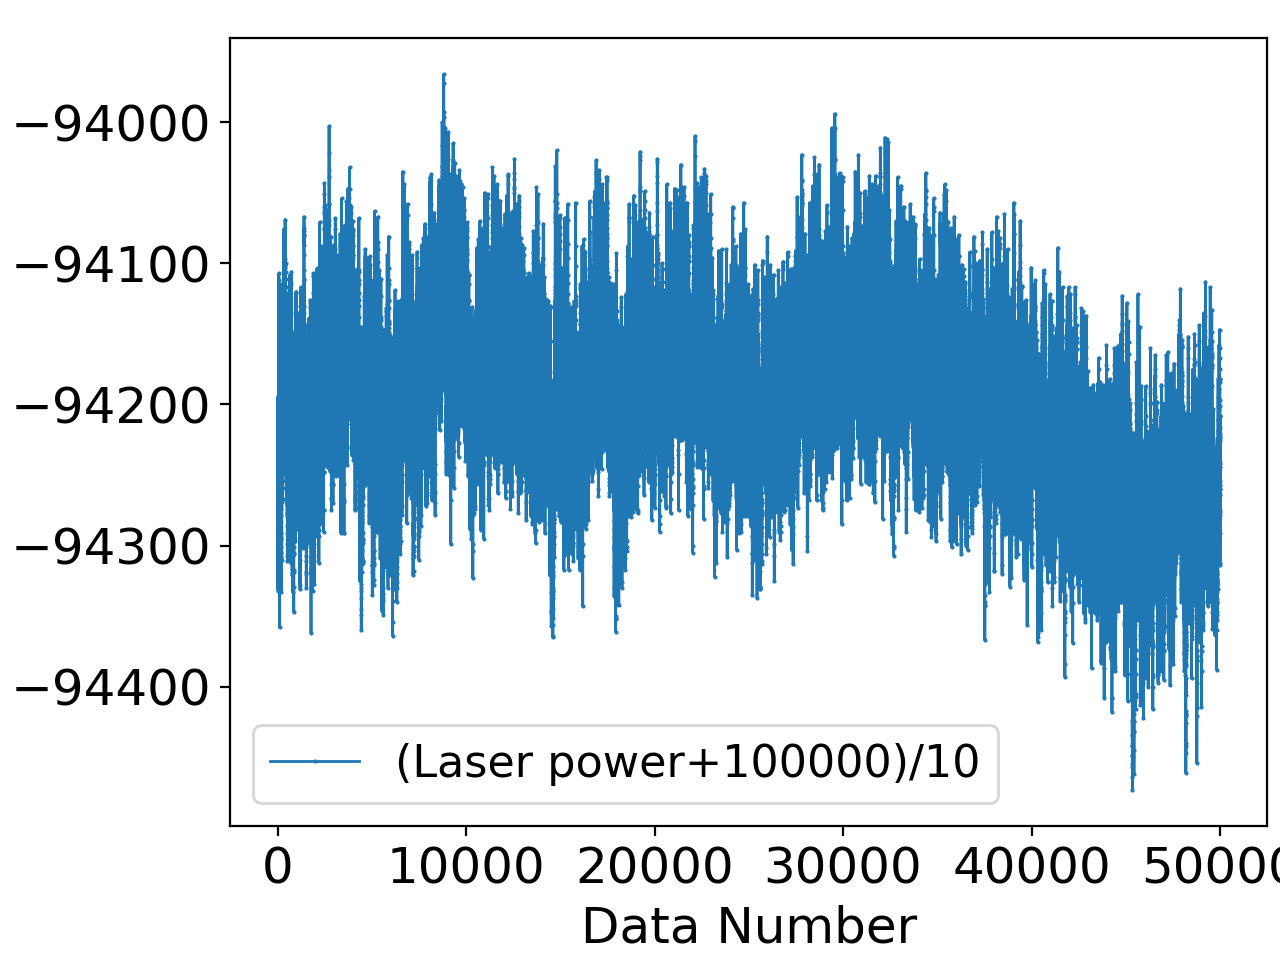

In [30]:
_,ax = plt.subplots()
plt.subplots_adjust(left=0.18, right=0.99, top=0.96, bottom=0.14)
#ax.plot(BeadHeight, '.-', label="Bead height",markersize=1,linewidth=1)
ax.plot((LaserPower), '.-', label="(Laser power+100000)/10",markersize=1,linewidth=1)
#ax.plot(Zfeedback, '.-', label="Z feedback",markersize=1,linewidth=1)
#plt.xlim(3800,4126)
#plt.ylim(-2500,2500)
ax.legend(fontsize=16)
ax.set_xlabel('Data Number', fontsize=18)
ax.set_ylabel('a.u.',fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

In [32]:
    data_det=signal.detrend(LaserPower)

    xpsd, freqs = matplotlib.mlab.psd(data_det, Fs = 5000, NFFT = 50000,window=mlab.window_none)



<IPython.core.display.Javascript object>


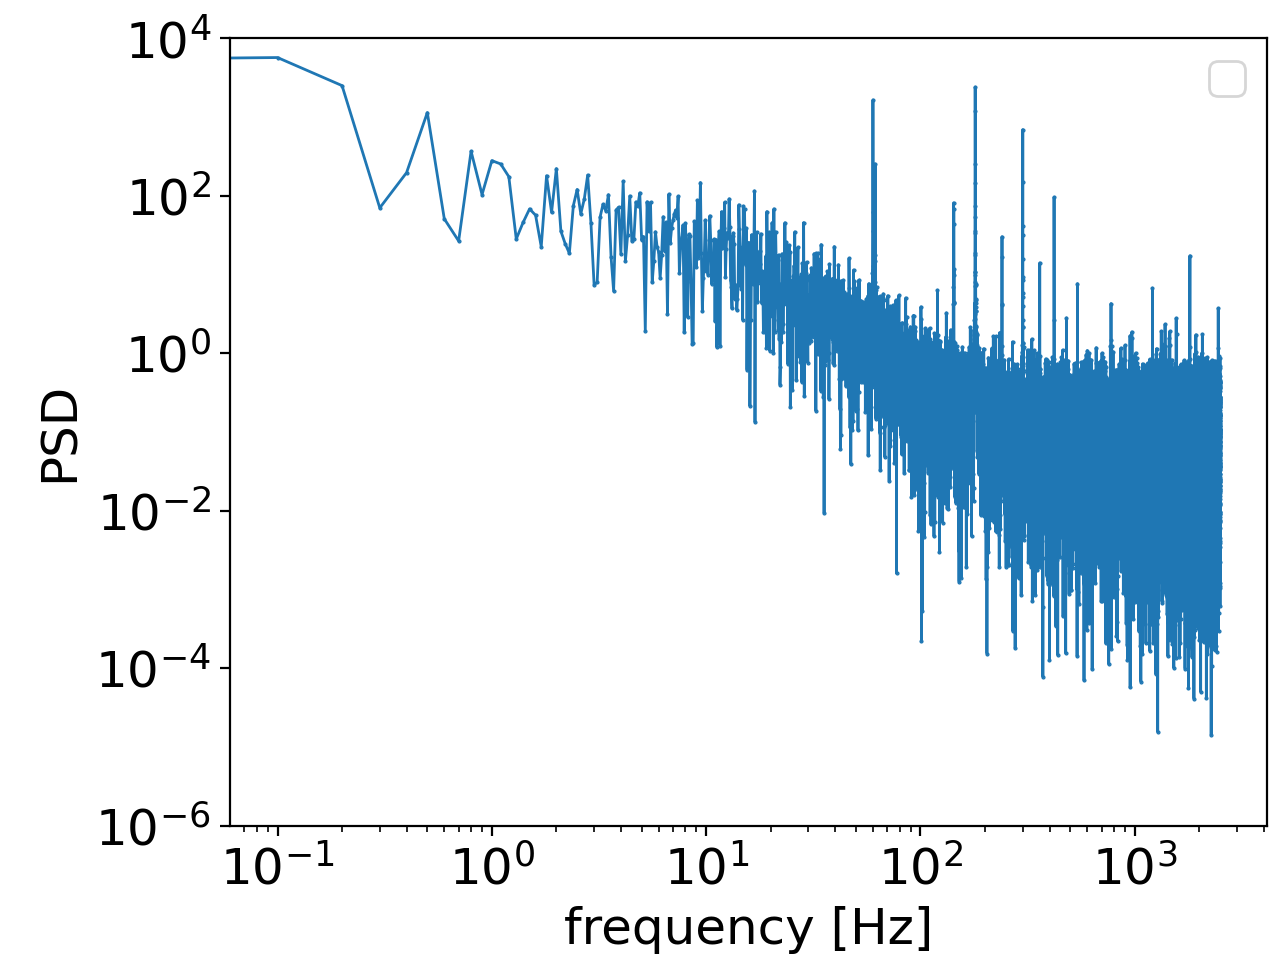

No handles with labels found to put in legend.


In [33]:
_,ax = plt.subplots()
plt.subplots_adjust(left=0.18, right=0.99, top=0.96, bottom=0.14)
#ax.plot(BeadHeight, '.-', label="Bead height",markersize=1,linewidth=1)
ax.loglog(freqs,xpsd, '.-',markersize=1,linewidth=1)
#ax.plot(Zfeedback, '.-', label="Z feedback",markersize=1,linewidth=1)
#plt.xlim(3800,4126)
plt.ylim(1e-6,1e4)
ax.legend(fontsize=16)
ax.set_xlabel('frequency [Hz]', fontsize=18)
ax.set_ylabel('PSD',fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

In [36]:
#for i in range(0,Ndata):
fname = r"/data/new_trap/20201110/Bead1/HeightPictures/HeightMonitor0_20201110/Discharge_14627.h5"
BDF = BeadDataFile.BeadDataFile(fname)
#BeadHeight[i]=BDF.bead_height
LaserPower2=BDF.Iz
#Zfeedback[i]=BDF.feedback[2][0]
data_det=signal.detrend(LaserPower2)
xpsd2, freqs = matplotlib.mlab.psd(data_det, Fs = 5000, NFFT = 50000,window=mlab.window_none)




<IPython.core.display.Javascript object>


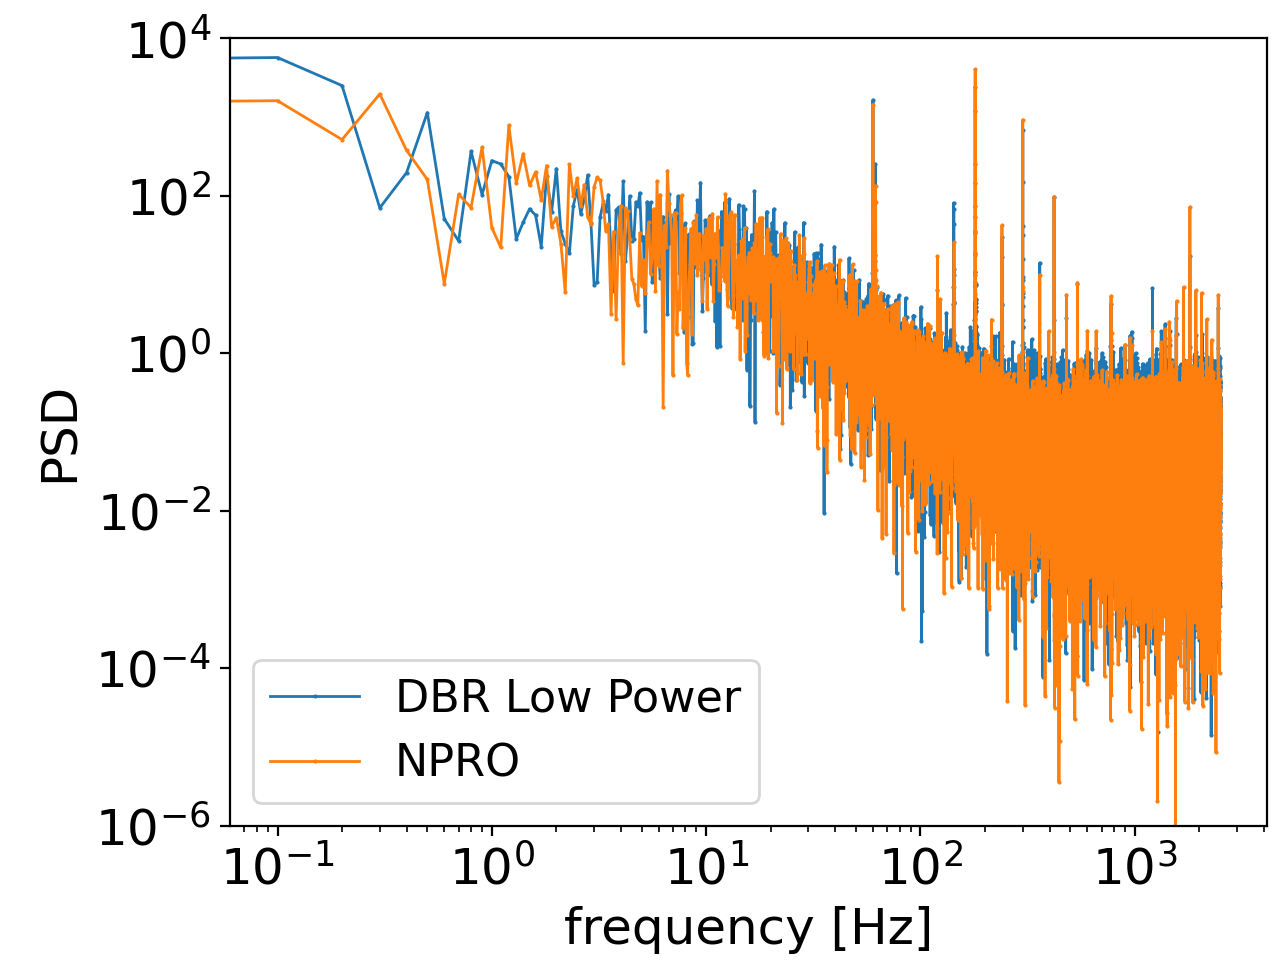

In [38]:
_,ax = plt.subplots()
plt.subplots_adjust(left=0.18, right=0.99, top=0.96, bottom=0.14)
#ax.plot(BeadHeight, '.-', label="Bead height",markersize=1,linewidth=1)
ax.loglog(freqs,xpsd, '.-', label="DBR Low Power",markersize=1,linewidth=1)
ax.loglog(freqs,xpsd2, '.-', label="NPRO",markersize=1,linewidth=1)

#ax.plot(Zfeedback, '.-', label="Z feedback",markersize=1,linewidth=1)
#plt.xlim(3800,4126)
plt.ylim(1e-6,1e4)
ax.legend(fontsize=16)
ax.set_xlabel('frequency [Hz]', fontsize=18)
ax.set_ylabel('PSD',fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)